##  Зарлыков Келсинбек Ain-1-21
##  Лабораторная работа №7
###  Работа с текстовыми данными.

#### Цель работы: изучить методы работы с текстовыми данными, применить их для анализа текстовых наборов.

In [1]:
from sklearn.datasets import load_files
reviews_train = load_files("aclImdb/train/")

#load_files возвращает коллекцию, содержащую обучающие тексты и обучающие метки
text_train, y_train = reviews_train.data, reviews_train.target

In [2]:
text_train = [doc.replace(b"<br />",b" ") for doc in text_train]

In [3]:
reviews_test = load_files("aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

    

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=10000, max_df = .15)
X = vect.fit_transform(text_train)

In [7]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=10, random_state=0)

document_topics = lda.fit_transform(X)

In [8]:
lda.components_.shape

(10, 10000)

In [9]:
import numpy as np 
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())

In [10]:
import mglearn
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
action        worst         plays         cast          show          
horror        didn          comedy        role          funny         
game          nothing       role          john          book          
effects       horror        school        performance   saw           
original      actually      town          star          years         
quite         minutes       harry         young         again         
fight         funny         played        play          10            
lot           actors        western       music         comedy        
however       re            joe           musical       am            
though        going         girl          plays         dvd           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
dire

In [11]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch", max_iter=10, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [12]:
import numpy as np 
topics = np.array([7,16,24,25,28,36,37,45,51,53,54,63,89,97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
williams      car           camera        king          kelly         family        work          
robin         budget        silent        effects       race          father        music         
hood          low           fields        monster       day           son           style         
fox           shot          train         special       gene          mother        art           
tracy         shots         keaton        giant         star          parents       unique        
students      werewolf      buster        creature      singer        sam           visual        
iron          around        act           monsters      oscar         boy           cinema        
jerry         pretty        face          evil          frank         brother       anime         
wolf      

In [13]:
music = np.argsort(document_topics100[:, 45])[::-1]
for i in music[:10]:
        print(b".".join(text_train[i].split(b".")[:2])+ b". \n")

b"If you were to cut an hour of this movie you might have something a little bit entertaining, although even then I don't think you'd have anything memorable. But at its full, seemingly endless length this movie just meanders on endlessly. \n"
b'After watching this film I had to wonder one thing. Why was this over two and half hours long? A very simple and pedestrian story of a few relationships between a group of adults. \n'
b"A dreary, hopelessly predictable film set in a most unpleasant setting (lower Coachella Valley). Acting is as amateurish as any I've seen. \n"
b"Secrets and Lies is my favourite movie so I was keen to see this. Unfortunately, it doesn't work on any level - the plot is unbelieveable and contrived, and the characters a little annoying. \n"
b"Having previously enjoyed Constantinos Giannaris's 'From The Edge Of The City', flawed though it was, I imagined this film might represent a coming to fruition of this director's potential.  Alas, this film fails on all fronts

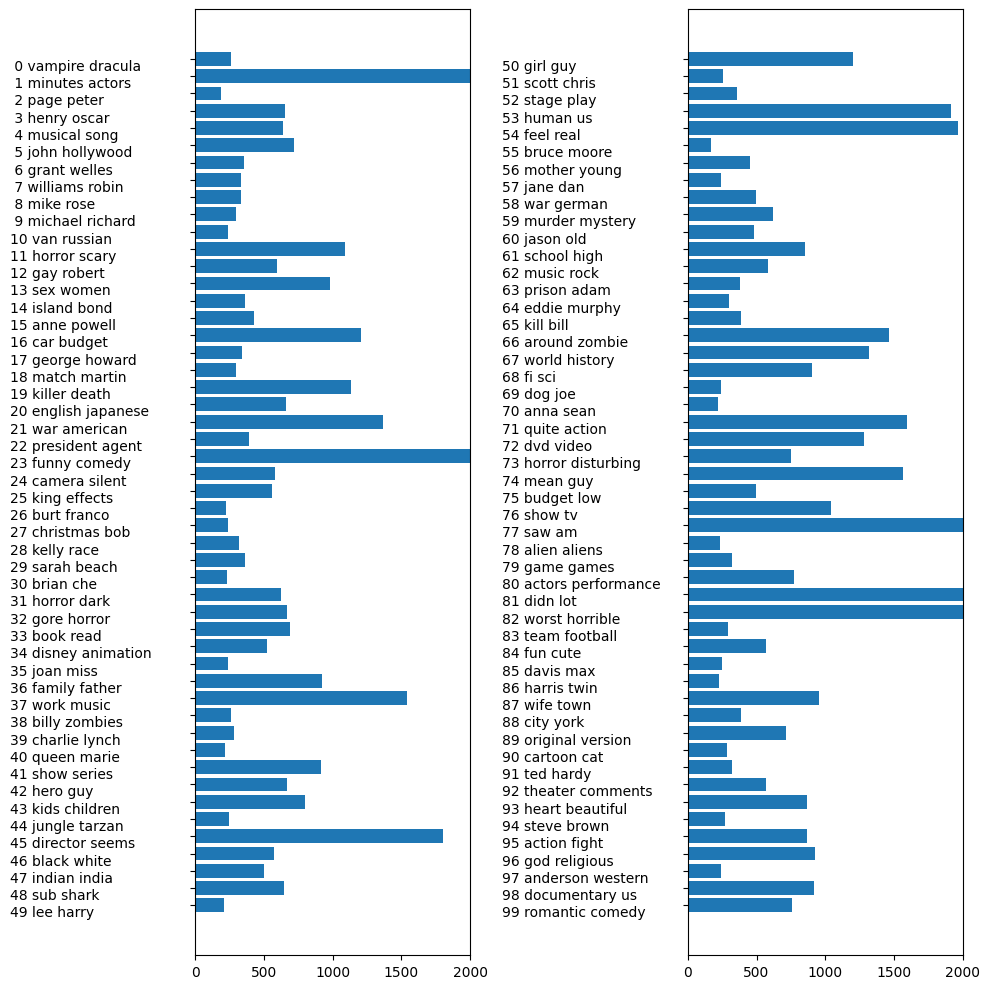

In [14]:
import matplotlib.pyplot as plt  
fig, ax = plt.subplots(1,2, figsize=(10,10))
topic_names = ["{:>2} ".format(i) + " ".join(words) for i, words in enumerate(feature_names[sorting[:, :2]])]
for col in [0,1]:
    start = col * 50
    end = (col+1) * 50 
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis = 0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0,2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

### ЗАДАНИЕ:
##### Создайте свой «мешок слов», например, набор из 20-25 отзывов о чем-либо, напишите краткое пояснение к данным.

In [42]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


import pandas as pd

car_reviews = [
    "Автомобиль в отличном состоянии, как новый!",
    "Продаю свою машину, потому что перехожу на новую модель.",
    "Мотор работает бесперебойно, не разу не подводил.",
    "Салон чистый, ухоженный, не курили в салоне.",
    "Отличная маневренность на дороге, удобно парковаться.",
    "Машина очень экономична в расходе топлива.",
    "Проведены все регулярные ТО, все документы в порядке.",
    "Кузов без царапин, вмятин и следов коррозии.",
    "Заинтересованным предоставлю полный отчет по техническому обслуживанию.",
    "Электроника работает без сбоев, все функции в исправном состоянии.",
    "Покупайте с уверенностью, не пожалеете!",
    "Очень удобные сиденья, особенно для длительных поездок.",
    "Продавец готов к торгу, приезжайте на осмотр и договоримся.",
    "Прекрасный автомобиль для городской езды.",
    "Спортивный внешний вид и отличная динамика.",
    "Система безопасности на высшем уровне.",
    "Машина экологична, соответствует стандартам выбросов.",
    "Причина продажи - переезд в другой город.",
    "Отличное предложение по цене, сравните с конкурентами!",
    "Владел машиной с новья, никаких проблем не возникало."
]

labels = [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Создаем DataFrame
df = pd.DataFrame({'text': car_reviews, 'label': labels})

# Вывод DataFrame
df



,text,label
0,"Автомобиль в отличном состоянии, как новый!",1
1,"Продаю свою машину, потому что перехожу на нов...",1
2,"Мотор работает бесперебойно, не разу не подводил.",1
3,"Салон чистый, ухоженный, не курили в салоне.",1
4,"Отличная маневренность на дороге, удобно парко...",1
5,Машина очень экономична в расходе топлива.,1
6,"Проведены все регулярные ТО, все документы в п...",1
7,"Кузов без царапин, вмятин и следов коррозии.",1
8,Заинтересованным предоставлю полный отчет по т...,1
9,"Электроника работает без сбоев, все функции в ...",1


In [43]:
text_train, text_test, y_train, y_test = train_test_split(df['text'],df['label'], test_size=0.2, random_state=42)


In [44]:
vect = CountVectorizer(max_features=10_000, max_df=.15)
X = vect.fit_transform(text_train)

In [45]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, learning_method='batch', max_iter=10, random_state=42)

document_topics = lda.fit_transform(X)

In [46]:
import mglearn

feature_names = np.array(vect.get_feature_names_out())
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

mglearn.tools.print_topics(topics=range(5), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
отличная      очень         работает      по            все           
вид           для           без           техническому  на            
спортивный    сиденья       электроника   полный        проведены     
внешний       поездок       состоянии     заинтересованнымдокументы     
динамика      длительных    исправном     предоставлю   то            
машина        удобные       функции       обслуживанию  регулярные    
покупайте     особенно      сбоев         отчет         порядке       
уверенностью  вмятин        машина        машина        договоримся   
пожалеете     кузов         бесперебойно  конкурентами  торгу         
очень         следов        мотор         цене          продавец      


In [55]:
import nltk
from nltk.corpus import stopwords

reviews = df['text'].tolist()
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('russian'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['text'] = df['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [56]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.85, min_df=0.1, max_features=500)

tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)

feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names_tfidf)

tfidf_df.head()

,автомобиль,машина,отличная,очень,работает,состоянии
0,0.707107,0.0,0.0,0.0,0.0,0.707107
1,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.0,1.0,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.0,1.0,0.0,0.0,0.000000
